<a href="https://colab.research.google.com/github/daveYR1409/AluraStore/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


## **Introducción**
En el presente proyecto se plantea realizar el análisis de ventas y rendimiento de las tiendas. El objetivo de este desafío es ayudar al señor Joao a decidir qué tienda debe vender para invertir en un nuevo negocio. Para ello, evaluaremos cuál de estas cuatro tiendas tiene un desempeño menor, permitiendo al señor Joao tomar la decisión de cuál de estas cuatro tiendas debe vender para invertir en un nuevo negocio.

**texto en negrita**

#1. Análisis de facturación



## **Desarrollo**
A continuación se muestra cada uno de los puntos a considerar para tener una resolución de cual de las tiendas del señor Joao
 es la candidata para ser vendida, se estructura de la siguiente manera:


1.   Análisis de facturación
2.   Ventas por categoría
3.   Calificación promedio de la tienda
4.   Productos **más** y **menos** vendidos
5.   Envío promedio por tienda

A continuación se detalla cada uno y se hará una conclusión con la sugerencia para el señor Joao.



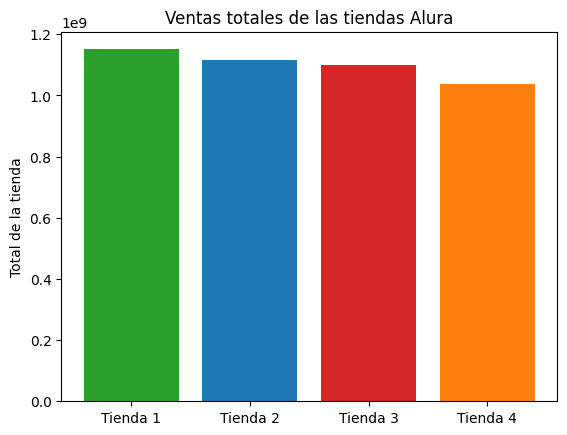

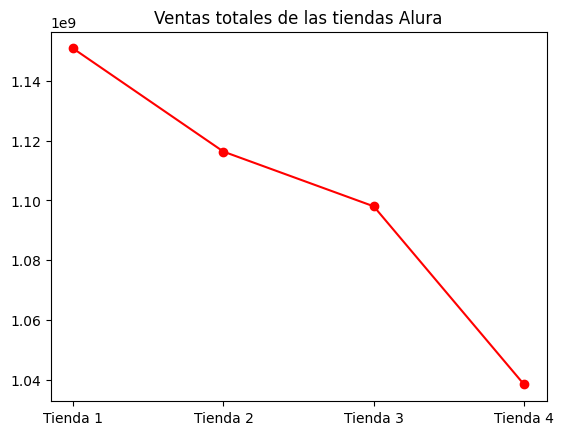

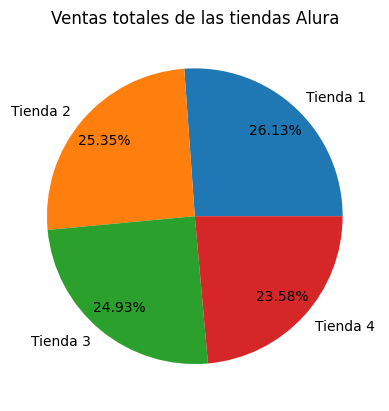

In [10]:
!pip install matplotlib #Se instala la librería de matplotlib con el objetivo de utilizar gráficos mas adelante
import matplotlib.pyplot as plt

def ventas(tienda):
  '''
  Esta función esta hecha para poder calcular la suma total de la venta de cada tienda
  tiene una variable como argumento y hace el cálculo de una de las columnas en específico (columna Precio)
  una vez creada la función puede ser usada para cada una de las tiendas que se debe calcular el total
  '''
  total_tienda = tienda['Precio'].sum()
  return total_tienda


#Gráfico de Barras
fig, ax = plt.subplots()
totales = [ventas(tienda), ventas(tienda2), ventas(tienda3), ventas(tienda4)]
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
bar_colors = ['tab:green', 'tab:blue', 'tab:red', 'tab:orange']
ax.bar(tiendas, totales, color=bar_colors)
ax.set_ylabel('Total de la tienda')
ax.set_title('Ventas totales de las tiendas Alura')
plt.show()

#Gráfico de línea
fig, ax = plt.subplots()
ax.plot(['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'], [ventas(tienda), ventas(tienda2), ventas(tienda3), ventas(tienda4)], 'o-r')
ax.set_title('Ventas totales de las tiendas Alura')
plt.show()

#Gráfico de Pastel
totales = [ventas(tienda), ventas(tienda2), ventas(tienda3), ventas(tienda4)]
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
fig, ax = plt.subplots()
plt.pie(totales, labels=tiendas, autopct='%.2f%%', pctdistance=0.8)
ax.set_title('Ventas totales de las tiendas Alura')
plt.show()

La primer tarea es hacer una sumatoria de las ventas totales de cada una de las tiendas del señor Joao, las cuáles quedaron de la siguiente manera de acuerdo al resultado.

1.   El total de la tienda 1 es: 1150880400.0
2.   El total de la tienda 2 es: 1116343500.0
3.   El total de la tienda 3 es: 1098019600.0
4.   El total de la tienda 4 es: 1038375700.0

De acuerdo a los totales y a los gráficos que se muestran anteriormente la tienda que **más** factura es la **tienda 1** y la que **menos** factura es la tienda 4.





# 2. Ventas por categoría

In [11]:
def ventasPorCategoria(tienda):
  '''
  Esta función tiene como objetivo el calcula el total de ventas por categoría del producto
  recibe un parámetro que en este caso será el Dataframe que contiene el archivo de cada tienda y este agrupa
  las categorías de producto, haciendo un conteo de los elementos vendidos que pertenecen a esa categoría
  haciendo una lista con los cinco primeros.
  '''
  categoria = tienda.groupby('Categoría del Producto').size().sort_values(ascending=False).head(5)
  mvxc = categoria.sum()
  print(mvxc)
  print(categoria)

print('Categorias más vendidas en Tienda 1')
ventasPorCategoria(tienda)
print('\n')
print('Categorias más vendidas en Tienda 2')
ventasPorCategoria(tienda2)
print('\n')
print('Categorias más vendidas en Tienda 3')
ventasPorCategoria(tienda3)
print('\n')
print('Categorias más vendidas en Tienda 4')
ventasPorCategoria(tienda4)

Categorias más vendidas en Tienda 1
1833
Categoría del Producto
Muebles                 465
Electrónicos            448
Juguetes                324
Electrodomésticos       312
Deportes y diversión    284
dtype: int64


Categorias más vendidas en Tienda 2
1757
Categoría del Producto
Muebles                 442
Electrónicos            422
Juguetes                313
Electrodomésticos       305
Deportes y diversión    275
dtype: int64


Categorias más vendidas en Tienda 3
1820
Categoría del Producto
Muebles                 499
Electrónicos            451
Juguetes                315
Electrodomésticos       278
Deportes y diversión    277
dtype: int64


Categorias más vendidas en Tienda 4
1800
Categoría del Producto
Muebles                 480
Electrónicos            451
Juguetes                338
Deportes y diversión    277
Electrodomésticos       254
dtype: int64


Revisando cada uno de los resultados, nos damos cuenta que muchos de los productos mas vendidos en cada tienda son los mismos, solo hay pequeñas diferencias en cuanto a la cantidad entre cada tienda al estar todo igual, se puede decir que cualquier tienda que venda no habria diferencia en las categorías mas vendidas, ya que son las mismas que las otras 3 con las que se quede.

# 3. Calificación promedio de la tienda


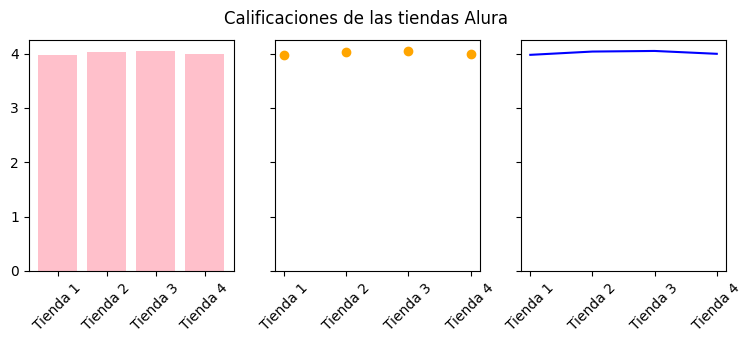

In [12]:
import matplotlib.pyplot as plt

def calificacionTienda(shop):
  '''
  Esta función pertenece a la tarea de calcular el promedio de cada una de las tiendas, lo que realiza es
  recibir un parámetro en el cual se hace una sumatoria de la columna "Calificación", una vez hecha la sumatoria
  esta se almacena en la variable suma_calificacion y posteriormente en otra variable se almacena el número de elementos
  de la columna y en una última variable llamada promedio se almacena la división de la suma entre el no. de elementos,
  obteniendo el promedio.

  '''
  suma_calificacion = shop['Calificación'].sum()
  elementos = len(shop['Calificación'])
  promedio = suma_calificacion / elementos
  return promedio

#Gráfico de Barras

fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)

axs[0].bar(['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'], [calificacionTienda(tienda), calificacionTienda(tienda2), calificacionTienda(tienda3), calificacionTienda(tienda4)], color='pink')
axs[0].tick_params(axis='x', rotation=45)
axs[1].scatter(['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'], [calificacionTienda(tienda), calificacionTienda(tienda2), calificacionTienda(tienda3), calificacionTienda(tienda4)], color='orange')
axs[1].tick_params(axis='x', rotation=45)
axs[2].plot(['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'], [calificacionTienda(tienda), calificacionTienda(tienda2), calificacionTienda(tienda3), calificacionTienda(tienda4)], color='blue')
axs[2].tick_params(axis='x', rotation=45)
fig.suptitle('Calificaciones de las tiendas Alura')
plt.show()

#Faltan 2 gráficos

En cuanto a la calificación, los gráficos mostrados también nos revelan una diferencia entre cada una de las tiendas.


1.  Tienda 1: 3.976685036032217
2.  Tienda 2: 4.037303942348453
3.  Tienda 3: 4.048325561678677
4.  Tienda 4: 3.9957591178965224

Destacando que tanto la tienda 2, cómo la tienda 3, tienen una calificación sobresaliente y dejando al final a la tienda 1, esto nos da una ídea de la satisfacción de los clientes con los productos que se venden en cada una de las tiendas.

# 4. Productos más y menos vendidos

In [6]:
product = []
for elemento in tienda2['Producto']:
    product.append(elemento)
    product.sort(reverse=False)

print(list(dict.fromkeys(product)))

from collections import Counter


['Ajedrez de madera', 'Armario', 'Asistente virtual', 'Auriculares', 'Auriculares con micrófono', 'Balón de baloncesto', 'Balón de voleibol', 'Batería', 'Bicicleta', 'Bloques de construcción', 'Cama box', 'Cama king', 'Carrito de control remoto', 'Celular ABXY', 'Ciencia de datos con Python', 'Cubertería', 'Cubo mágico 8x8', 'Cuerda para saltar', 'Dashboards con Power BI', 'Dinosaurio Rex', 'Estufa', 'Guitarra acústica', 'Guitarra eléctrica', 'Impresora', 'Iniciando en programación', 'Iphone 15', 'Juego de mesa', 'Kit de bancas', 'Lavadora de ropa', 'Lavavajillas', 'Mesa de centro', 'Mesa de comedor', 'Mesa de noche', 'Microondas', 'Mochila', 'Modelado predictivo', 'Muñeca bebé', 'Olla de presión', 'Pandereta', 'Refrigerador', 'Secadora de ropa', 'Set de ollas', 'Set de vasos', 'Silla de oficina', 'Sillón', 'Smart TV', 'Smartwatch', 'Sofá reclinable', 'TV LED UHD 4K', 'Tablet ABXY', 'Vaso térmico']


In [15]:
def ordenar_por_frecuencia(datos):
  conteo = Counter(datos)
  return conteo.most_common(6)

datos_ordenados = ordenar_por_frecuencia(product)
elementos_ordenados = [elemento for elemento, frecuencia in datos_ordenados]



Productos mas vendidos de la tienda 1:
Producto
Armario                    60
TV LED UHD 4K              60
Microondas                 60
Secadora de ropa           58
Mesa de noche              56
Bloques de construcción    56
dtype: int64
350

Productos mas vendidos de la tienda 2:
Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Pandereta                    58
Guitarra acústica            58
Secadora de ropa             57
dtype: int64
361

Productos mas vendidos de la tienda 3:
Producto
Kit de bancas      57
Mesa de comedor    56
Cama king          56
Set de ollas       55
Mesa de noche      55
Smart TV           54
dtype: int64
333

Productos mas vendidos de la tienda 4:
Producto
Cama box                     62
Cubertería                   59
Cama king                    56
Dashboards con Power BI      56
Carrito de control remoto    55
Mesa de noche                55
dtype: int64
343


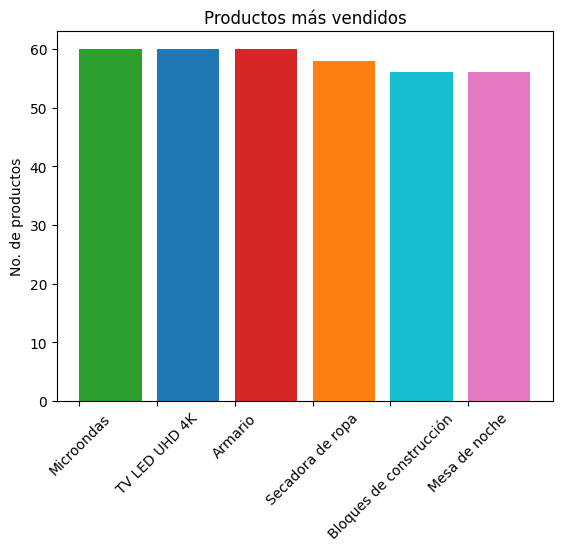

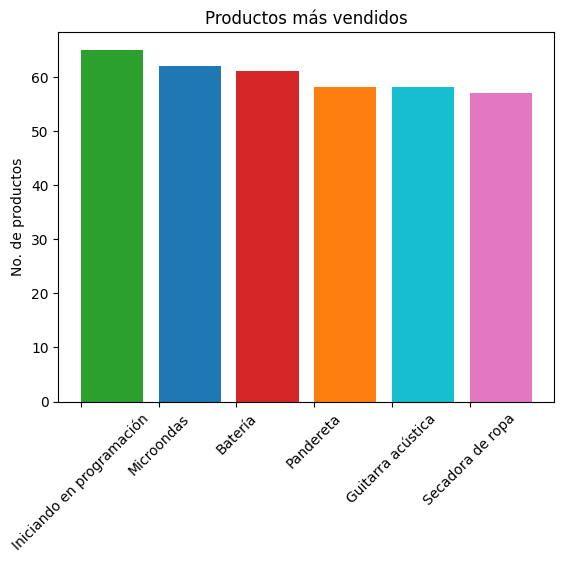

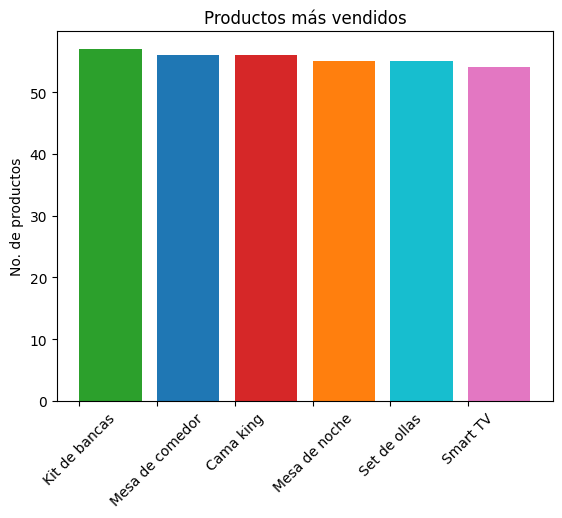

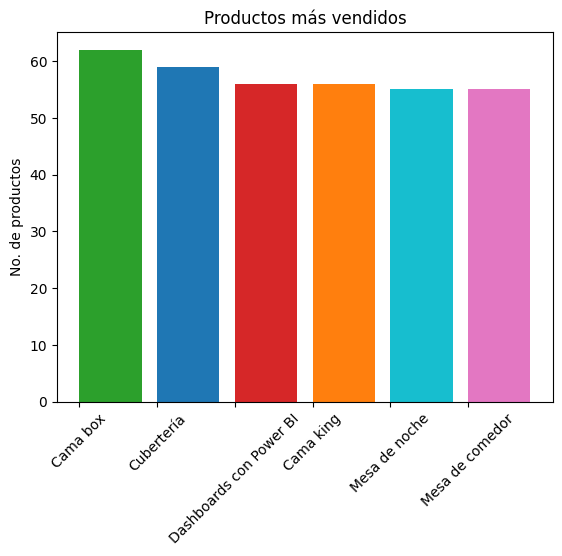

In [9]:
import matplotlib.pyplot as plt
from collections import Counter

def productosMasVendido(documento):
  product = []
  for elemento in documento['Producto']:
    product.append(elemento)
  conteo = Counter(product)
  conteo.most_common(6)
  datos_ordenados = ordenar_por_frecuencia(product)
  elementos_ordenados = [elemento for elemento, frecuencia in datos_ordenados]
  '''
  1-Se crea una lista con los productos que vende la tienda
  2-Crear la variable conteo donde almaceno la cuenta de los datos de la variable que contiene la lista de productos(list)
  3-most_common: hace un conteo de los productos más repetidos dentro de la lista, el 6 es el limite de datos que quiero obtener, puede modificarse de acuerdo a las necesidades.
  '''
  mas_vendidos = documento.groupby('Producto').size().sort_values(ascending=False).head(6)
  masmasv = mas_vendidos.sum()
  lista_m = mas_vendidos.tolist()
  print(mas_vendidos)
  print(masmasv)
  #Gráfico de barras
  fig, ax = plt.subplots()
  bar_colors = ['tab:green', 'tab:blue', 'tab:red', 'tab:orange', 'tab:cyan', 'tab:pink']
  ax.bar(elementos_ordenados, lista_m, align='edge', color=bar_colors)
  plt.xticks(rotation=45)
  ax.set_ylabel('No. de productos')
  ax.set_title('Productos más vendidos')

print('Productos mas vendidos de la tienda 1:')
productosMasVendido(tienda)
print('\nProductos mas vendidos de la tienda 2:')
productosMasVendido(tienda2)
print('\nProductos mas vendidos de la tienda 3:')
productosMasVendido(tienda3)
print('\nProductos mas vendidos de la tienda 4:')
productosMasVendido(tienda4)


Productos menos vendidos de la tienda 1:
Producto
Auriculares con micrófono      33
Celular ABXY                   33
Olla de presión                35
Pandereta                      36
Ciencia de datos con Python    39
Mochila                        39
dtype: int64
215

Productos menos vendidos de la tienda 2:
Producto
Juego de mesa        32
Impresora            34
Mesa de comedor      34
Sillón               35
Auriculares          37
Asistente virtual    38
dtype: int64
210

Productos menos vendidos de la tienda 3:
Producto
Bloques de construcción    35
Set de vasos               36
Mochila                    36
Microondas                 36
Vaso térmico               38
Guitarra eléctrica         38
dtype: int64
219

Productos menos vendidos de la tienda 4:
Producto
Guitarra eléctrica             33
Armario                        34
Guitarra acústica              37
Ciencia de datos con Python    38
Lavadora de ropa               38
Refrigerador                   38
dtype: int64
2

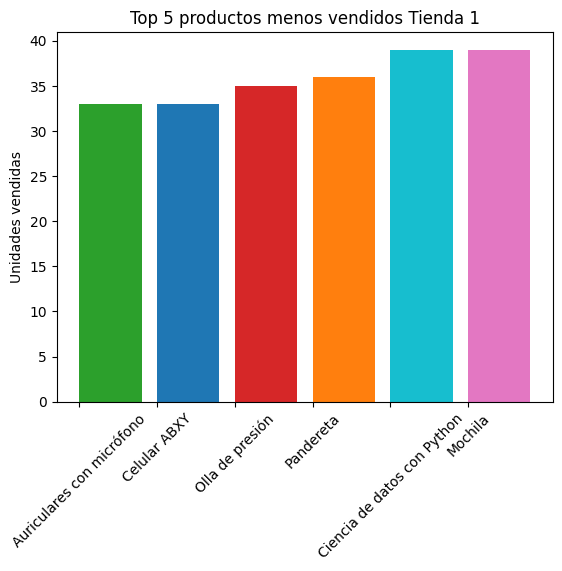

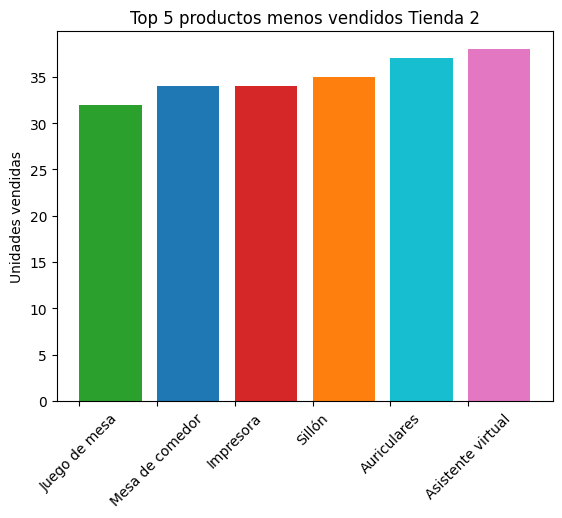

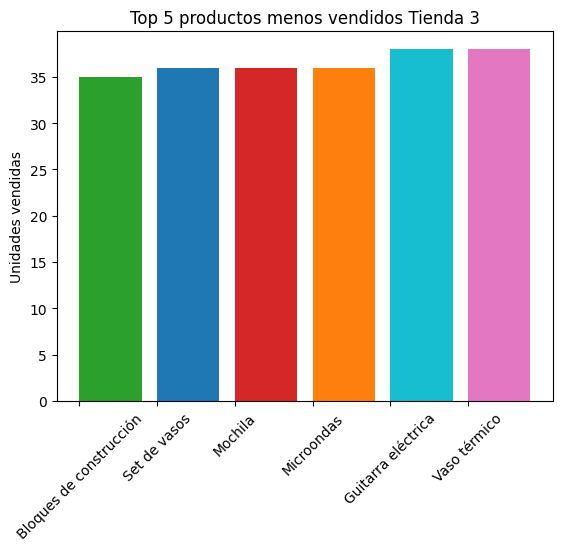

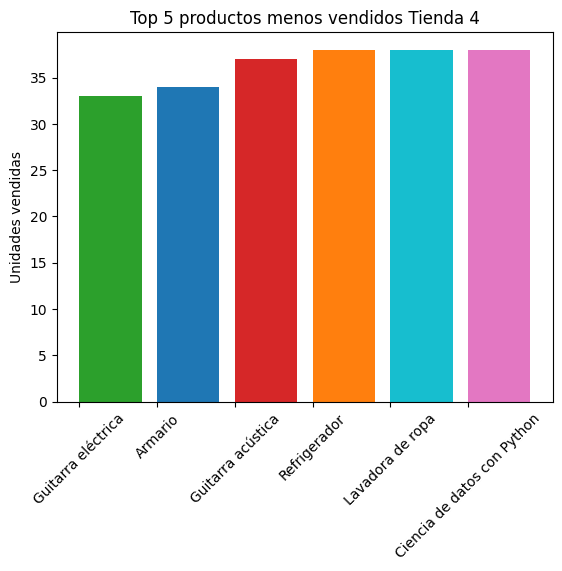

In [4]:
import matplotlib.pyplot as plt
from collections import Counter

def productosMenosVendidos(doct, num):
  '''
  Creo una lista con los productos que vende la tienda
  1-Creo la variable conteo donde almaceno la cuenta de los datos de la variable que contiene la lista de productos(list)
  2-Obtener los elementos ordenados por frecuencia (de menor a mayor)
  3. Obtener los 10 elementos menos comunes
  '''

  producto_menos = []
  for elemento in doct['Producto']:
    producto_menos.append(elemento)

  contador = Counter(producto_menos)
  elementos_ordenados = sorted(contador.items(), key=lambda item: item[1])
  menos_comunes = [elemento for elemento, frecuencia in elementos_ordenados[:6]]
  menos_vendidos = doct.groupby('Producto').size().sort_values(ascending=True).head(6)
  suma_mv = menos_vendidos.sum()
  lista_m = menos_vendidos.tolist()
  print(menos_vendidos)
  print(suma_mv)

  #Gráfico de barras
  fig, ax = plt.subplots()
  bar_colors = ['tab:green', 'tab:blue', 'tab:red', 'tab:orange', 'tab:cyan', 'tab:pink']
  ax.bar(menos_comunes, lista_m, align='edge', color=bar_colors)
  plt.xticks(rotation=45)
  ax.set_ylabel('Unidades vendidas')
  ax.set_title(f'Top 5 productos menos vendidos Tienda {num}')

print('Productos menos vendidos de la tienda 1:')
productosMenosVendidos(tienda, 1)
print('\nProductos menos vendidos de la tienda 2:')
productosMenosVendidos(tienda2, 2)
print('\nProductos menos vendidos de la tienda 3:')
productosMenosVendidos(tienda3, 3)
print('\nProductos menos vendidos de la tienda 4:')
productosMenosVendidos(tienda4, 4)

# 5. Envío promedio por tienda

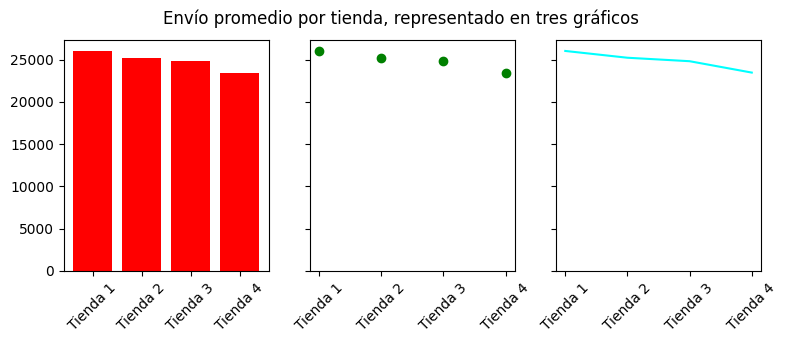

In [14]:
import matplotlib.pyplot as plt

def promedioEnvio(costo):
  suma_calificacion = costo['Costo de envío'].sum()
  elementos = len(costo['Costo de envío'])
  promedio = suma_calificacion / elementos
  return promedio


fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)

axs[0].bar(['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'], [promedioEnvio(tienda), promedioEnvio(tienda2), promedioEnvio(tienda3), promedioEnvio(tienda4)], color='red')
axs[0].tick_params(axis='x', rotation=45)
axs[1].scatter(['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'], [promedioEnvio(tienda), promedioEnvio(tienda2), promedioEnvio(tienda3), promedioEnvio(tienda4)], color='green')
axs[1].tick_params(axis='x', rotation=45)
axs[2].plot(['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'], [promedioEnvio(tienda), promedioEnvio(tienda2), promedioEnvio(tienda3), promedioEnvio(tienda4)], color='cyan')
axs[2].tick_params(axis='x', rotation=45)
fig.suptitle('Envío promedio por tienda, representado en tres gráficos')
plt.show()

Por último, el promedio de envios que tiene cada tienda sirve para darte cuenta cuanto se está gastando cada una de las tiendas en los envíos, esto con el objetivo de saber donde hay un área de oportunidad y posiblemente bajar los costos y sea mas rentable, aquí se destaca que la tienda 1, es la que más gastos promedio tuvo, la tienda 2 y 3 tienen un promedio similar y la tienda 4 es la que tiene el menor promedio, esto significa que es la que menos gasta en envio, puede deberse también a que es la que menos vende en comparación con las otras.

## **Conclusión**
Con base en el análisis de cada uno de los puntos, fui realizando rankings en cada punto para ver la posición de cada tienda, al final lo que decidió mi sugerencia fueron puntos tales como: en los productos más vendidos, una suma de unidades del top 6 de todos los productos y basándome en esa suma, ver cuantas unidades vendía cada tienda, también entre los menos vendidos, sumar cada una de las cantidades y ver cual sumatoria era menor, en conclusión y como sugerencia para el señor Joao, puedo decir que la Tienda 2 es para mi la que puede vender, para invertir en otro negocio.